In [1]:
import fastf1 as ff1
from fastf1 import plotting
import fastf1.plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cbook as cbook
import matplotlib.image as image

from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd

In [2]:
# Configurar gráficos
ff1.plotting.setup_mpl()

# Habilitamos el cache en nuestro equipo
ff1.Cache.enable_cache('cache') 

# Ignoramos los Warning
pd.options.mode.chained_assignment = None 

In [3]:
year = int(input('Año: '))
wknd = int(input('Round: '))
print('------ Session Type ------')
print('R - Race')
print('Q - Qualifying')
print('SQ - Sprint Qualifying')
print('FP1 - Practice 1')
print('FP2 - Practice 2')
print('FP3 - Practice 3')
print('--------------------------')
ses = input('Session :')
qualy = 'Q'
driver1 = input('Piloto 1: ')
driver2 = input('Piloto 2: ')

Año: 2022
Round: 22
------ Session Type ------
R - Race
Q - Qualifying
SQ - Sprint Qualifying
FP1 - Practice 1
FP2 - Practice 2
FP3 - Practice 3
--------------------------
Session :R
Piloto 1: GAS
Piloto 2: OCO


In [4]:
# Cargar la carrera y clasificación
race = ff1.get_session(year, wknd, ses)
quali = ff1.get_session(year, wknd, qualy)

In [5]:
# Get the laps
laps_r = race.load(telemetry=True)
laps_q = quali.load(telemetry=True)

core           INFO 	Loading data for Abu Dhabi Grand Prix - Race [v2.2.8]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '11', '55', '63', '4', '31', '18', '3', '5', '22', '24', '23', '10', '77', '47', '20', '44', '6', '14']
core           INFO 	Loading data for Abu Dhabi Grand Prix - Qualifying [v2.2.8]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for t

In [6]:
fastest_lap = race.laps.pick_fastest()
print(f'Vuelta más rápida: ',fastest_lap['LapTime'])
print(f'Tipo de neumático: ',fastest_lap['Compound'])
print(f'Piloto: ',fastest_lap['Driver'])

Vuelta más rápida:  0 days 00:01:28.391000
Tipo de neumático:  MEDIUM
Piloto:  NOR


In [7]:
laps_drive1 = race.laps.pick_driver(driver1)
laps_drive2 = race.laps.pick_driver(driver2)

In [8]:
laps_drive1

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
752,0 days 01:03:52.456000,10,NaT,1,1,0 days 00:21:19.467000,NaT,NaT,0 days 00:00:40.628000,0 days 00:00:36.414000,...,False,SOFT,1.0,True,0 days 01:02:10.161000,AlphaTauri,GAS,1,False,2022-11-20 13:03:11.207
753,0 days 01:05:27.092000,10,0 days 00:01:34.636000,2,1,NaT,NaT,0 days 00:00:18.956000,0 days 00:00:39.607000,0 days 00:00:36.073000,...,False,SOFT,2.0,True,0 days 01:03:52.456000,AlphaTauri,GAS,1,True,2022-11-20 13:04:53.502
754,0 days 01:06:59.562000,10,0 days 00:01:32.470000,3,1,NaT,NaT,0 days 00:00:19.198000,0 days 00:00:38.735000,0 days 00:00:34.537000,...,False,SOFT,3.0,True,0 days 01:05:27.092000,AlphaTauri,GAS,1,True,2022-11-20 13:06:28.138
755,0 days 01:08:32.035000,10,0 days 00:01:32.473000,4,1,NaT,NaT,0 days 00:00:18.726000,0 days 00:00:39.191000,0 days 00:00:34.556000,...,False,SOFT,4.0,True,0 days 01:06:59.562000,AlphaTauri,GAS,1,True,2022-11-20 13:08:00.608
756,0 days 01:10:04.616000,10,0 days 00:01:32.581000,5,1,NaT,NaT,0 days 00:00:18.749000,0 days 00:00:38.848000,0 days 00:00:34.984000,...,False,SOFT,5.0,True,0 days 01:08:32.035000,AlphaTauri,GAS,1,True,2022-11-20 13:09:33.081
757,0 days 01:11:37.922000,10,0 days 00:01:33.306000,6,1,NaT,NaT,0 days 00:00:18.831000,0 days 00:00:39.450000,0 days 00:00:35.025000,...,False,SOFT,6.0,True,0 days 01:10:04.616000,AlphaTauri,GAS,1,True,2022-11-20 13:11:05.662
758,0 days 01:13:10.339000,10,0 days 00:01:32.417000,7,1,NaT,NaT,0 days 00:00:18.750000,0 days 00:00:39.210000,0 days 00:00:34.457000,...,False,SOFT,7.0,True,0 days 01:11:37.922000,AlphaTauri,GAS,1,True,2022-11-20 13:12:38.968
759,0 days 01:14:42.876000,10,0 days 00:01:32.537000,8,1,NaT,NaT,0 days 00:00:18.727000,0 days 00:00:39.377000,0 days 00:00:34.433000,...,False,SOFT,8.0,True,0 days 01:13:10.339000,AlphaTauri,GAS,1,True,2022-11-20 13:14:11.385
760,0 days 01:16:15.586000,10,0 days 00:01:32.710000,9,1,NaT,NaT,0 days 00:00:18.689000,0 days 00:00:39.522000,0 days 00:00:34.499000,...,False,SOFT,9.0,True,0 days 01:14:42.876000,AlphaTauri,GAS,1,True,2022-11-20 13:15:43.922
761,0 days 01:17:48.328000,10,0 days 00:01:32.742000,10,1,NaT,NaT,0 days 00:00:18.710000,0 days 00:00:39.325000,0 days 00:00:34.707000,...,False,SOFT,10.0,True,0 days 01:16:15.586000,AlphaTauri,GAS,1,True,2022-11-20 13:17:16.632


In [9]:
laps_drive2

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
348,0 days 01:03:47.378000,31,NaT,1,1,0 days 00:24:18.791000,NaT,NaT,0 days 00:00:39.109000,0 days 00:00:34.774000,...,False,MEDIUM,1.0,True,0 days 01:02:10.161000,Alpine,OCO,1,False,2022-11-20 13:03:11.207
349,0 days 01:05:19.514000,31,0 days 00:01:32.136000,2,1,NaT,NaT,0 days 00:00:18.546000,0 days 00:00:39.296000,0 days 00:00:34.294000,...,False,MEDIUM,2.0,True,0 days 01:03:47.378000,Alpine,OCO,1,True,2022-11-20 13:04:48.424
350,0 days 01:06:50.899000,31,0 days 00:01:31.385000,3,1,NaT,NaT,0 days 00:00:18.451000,0 days 00:00:38.497000,0 days 00:00:34.437000,...,False,MEDIUM,3.0,True,0 days 01:05:19.514000,Alpine,OCO,1,True,2022-11-20 13:06:20.560
351,0 days 01:08:22.326000,31,0 days 00:01:31.427000,4,1,NaT,NaT,0 days 00:00:18.458000,0 days 00:00:38.908000,0 days 00:00:34.061000,...,False,MEDIUM,4.0,True,0 days 01:06:50.899000,Alpine,OCO,1,True,2022-11-20 13:07:51.945
352,0 days 01:09:54.048000,31,0 days 00:01:31.722000,5,1,NaT,NaT,0 days 00:00:18.462000,0 days 00:00:39.149000,0 days 00:00:34.111000,...,False,MEDIUM,5.0,True,0 days 01:08:22.326000,Alpine,OCO,1,True,2022-11-20 13:09:23.372
353,0 days 01:11:26.030000,31,0 days 00:01:31.982000,6,1,NaT,NaT,0 days 00:00:18.743000,0 days 00:00:39.237000,0 days 00:00:34.002000,...,False,MEDIUM,6.0,True,0 days 01:09:54.048000,Alpine,OCO,1,True,2022-11-20 13:10:55.094
354,0 days 01:12:57.792000,31,0 days 00:01:31.762000,7,1,NaT,NaT,0 days 00:00:18.442000,0 days 00:00:39.255000,0 days 00:00:34.065000,...,False,MEDIUM,7.0,True,0 days 01:11:26.030000,Alpine,OCO,1,True,2022-11-20 13:12:27.076
355,0 days 01:14:30.503000,31,0 days 00:01:32.711000,8,1,NaT,NaT,0 days 00:00:18.707000,0 days 00:00:39.262000,0 days 00:00:34.742000,...,False,MEDIUM,8.0,True,0 days 01:12:57.792000,Alpine,OCO,1,True,2022-11-20 13:13:58.838
356,0 days 01:16:03.095000,31,0 days 00:01:32.592000,9,1,NaT,NaT,0 days 00:00:18.534000,0 days 00:00:39.638000,0 days 00:00:34.420000,...,False,MEDIUM,9.0,True,0 days 01:14:30.503000,Alpine,OCO,1,True,2022-11-20 13:15:31.549
357,0 days 01:17:35.672000,31,0 days 00:01:32.577000,10,1,NaT,NaT,0 days 00:00:18.622000,0 days 00:00:39.597000,0 days 00:00:34.358000,...,False,MEDIUM,10.0,True,0 days 01:16:03.095000,Alpine,OCO,1,True,2022-11-20 13:17:04.141


In [10]:
print(laps_drive1['LapNumber'].max())
print(laps_drive2['LapNumber'].max())

57
58


In [11]:
piloto1 = race.get_driver(driver1)
piloto2 = race.get_driver(driver2)

In [12]:
d1_team = pd.unique(laps_drive1['Team'])
print(d1_team)

['AlphaTauri']


In [13]:
color1 = ff1.plotting.driver_color(driver1)
color2 = ff1.plotting.driver_color(driver2)
#Si el gráfico es similar se pone otro color Blanco
#color2 = '#FFFFFF'

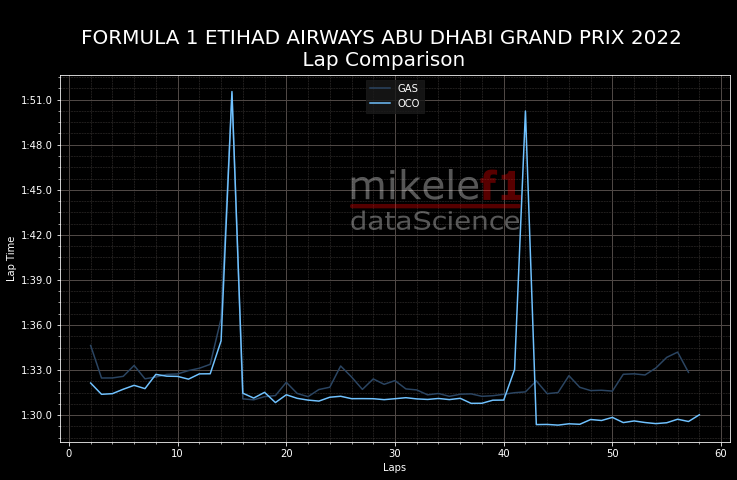

In [14]:
plt.rcParams['figure.figsize'] = [12, 12]
#Imagen para la marca de agua
with cbook.get_sample_data('/Users/rubenrodriguez/Documents/anaconda/fastf1/images/logog.png') as file:
    im = image.imread(file)

#Modo oscuro
plt.style.use('dark_background')


fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))

plt.rcParams['figure.figsize'] = [13, 13]


plt.suptitle(f"\n{race.event['OfficialEventName']} \n Lap Comparison \n"
             , size=20, y=1.02)

#fig, ax = plt.subplots()
#plt.suptitle(f"Lap Comparison \n "
#             f"{race.event['EventName']} {race.event.year} Race \n")
#             f"{piloto1['FullName']} &  {piloto2['FullName']} \n")

ax.plot(laps_drive1['LapNumber'], laps_drive1['LapTime'], color = color1,  label=piloto1['Abbreviation'])
ax.plot(laps_drive2['LapNumber'], laps_drive2['LapTime'], color = color2 , label=piloto2['Abbreviation'])
ax.set(ylabel='Lap Time', xlabel='Laps')
ax.legend(loc="upper center")

fig.figimage(im, xo=350, yo=250, zorder=13, alpha=.35)

nombrearchivo = str(year)+'-'+str(wknd)+'-LC'+ses+'-'+driver1+'-'+driver2+'.png'
plt.savefig(nombrearchivo)
plt.show()